In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Import charging output file from SUMO
df_output = pd.read_csv('charging_output.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


# Public

In [4]:
# Make copy
df = df_output
df

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [6]:
# Filter by charging steps of public charging stations only
df_public = df.loc[df['charging_station'].str.contains("public")]
df_public

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
340,0,hh1_ev1_public,not charging,NaN,NaN,NaN,NaN
341,0,hh1_ev2_public,not charging,NaN,NaN,NaN,NaN
342,0,hh1_ev3_public,not charging,NaN,NaN,NaN,NaN
343,0,hh1_ev4_public,not charging,NaN,NaN,NaN,NaN
344,0,hh1_ev5_public,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [7]:
# Filter second auxiliary data table by charging events at public
df_public2 = df.loc[df['status'] == "charging"]
df_public2 = df_public2.loc[df_public2['charging_station'].str.contains("public")]
df_public2

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
26570,10800,hh16_ev126_public,charging,HH_16_EV_126.0,6.11,12129.67,64000.0
27969,11400,hh16_ev126_public,charging,HH_16_EV_126.0,6.11,15796.34,64000.0
29368,12000,hh16_ev126_public,charging,HH_16_EV_126.0,6.11,19463.00,64000.0
30767,12600,hh16_ev126_public,charging,HH_16_EV_126.0,6.11,23129.67,64000.0
32166,13200,hh16_ev126_public,charging,HH_16_EV_126.0,6.11,26796.34,64000.0
...,...,...,...,...,...,...,...
93699,39600,hh16_ev103_public,charging,HH_16_EV_103.0,6.11,62425.08,64000.0
93701,39600,hh16_ev105_public,charging,HH_16_EV_105.0,6.11,62772.20,64000.0
93728,39600,hh16_ev132_public,charging,HH_16_EV_132.0,6.11,63887.86,64000.0
93730,39600,hh16_ev134_public,charging,HH_16_EV_134.0,6.11,63938.29,64000.0


In [8]:
# Filter third auxiliary data table by charging events at public
df_public3 = df.loc[df['status'] == "not charging"]
df_public3 = df_public3.loc[df_public3['charging_station'].str.contains("public")]
df_public3

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
340,0,hh1_ev1_public,not charging,NaN,NaN,NaN,NaN
341,0,hh1_ev2_public,not charging,NaN,NaN,NaN,NaN
342,0,hh1_ev3_public,not charging,NaN,NaN,NaN,NaN
343,0,hh1_ev4_public,not charging,NaN,NaN,NaN,NaN
344,0,hh1_ev5_public,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [9]:
# Summarize steps of third auxiliary data table
df_public3 = df_public3.groupby(['step']).size().reset_index(name="count")
df_public3.head(60)

,step,count
0,0,593
1,600,593
2,1200,593
3,1800,593
4,2400,593
5,3000,593
6,3600,593
7,4200,593
8,4800,593
9,5400,593


In [10]:
# Summarize steps of second auxiliary data table
df_public2 = df_public2.groupby(['step']).size().reset_index(name="count")
df_public2

,step,count
0,10800,1
1,11400,1
2,12000,1
3,12600,1
4,13200,1
5,13800,1
6,14400,1
7,15000,1
8,15600,8
9,16200,23


In [11]:
# Summarize steps of data table 
df_public = df_public.groupby(['step']).size().reset_index(name="count")
df_public

,step,count
0,0,593
1,600,593
2,1200,593
3,1800,593
4,2400,593
...,...,...
140,84000,593
141,84600,593
142,85200,593
143,85800,593


In [12]:
# Get charging steps by substracting the number of non-charging steps
df_public['charging'] = df_public['count'] - df_public3['count']
df_public

,step,count,charging
0,0,593,0
1,600,593,0
2,1200,593,0
3,1800,593,0
4,2400,593,0
...,...,...,...
140,84000,593,0
141,84600,593,0
142,85200,593,0
143,85800,593,0


In [13]:
# Change time to hour units
df_public['charging'] = df_public['charging'] * 22
df_public["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_public.head(50)

,step,count,charging
0,06:00,593,0
1,06:10,593,0
2,06:20,593,0
3,06:30,593,0
4,06:40,593,0
5,06:50,593,0
6,07:00,593,0
7,07:10,593,0
8,07:20,593,0
9,07:30,593,0


In [14]:
# Sort by time
df_public = df_public.sort_values('step')

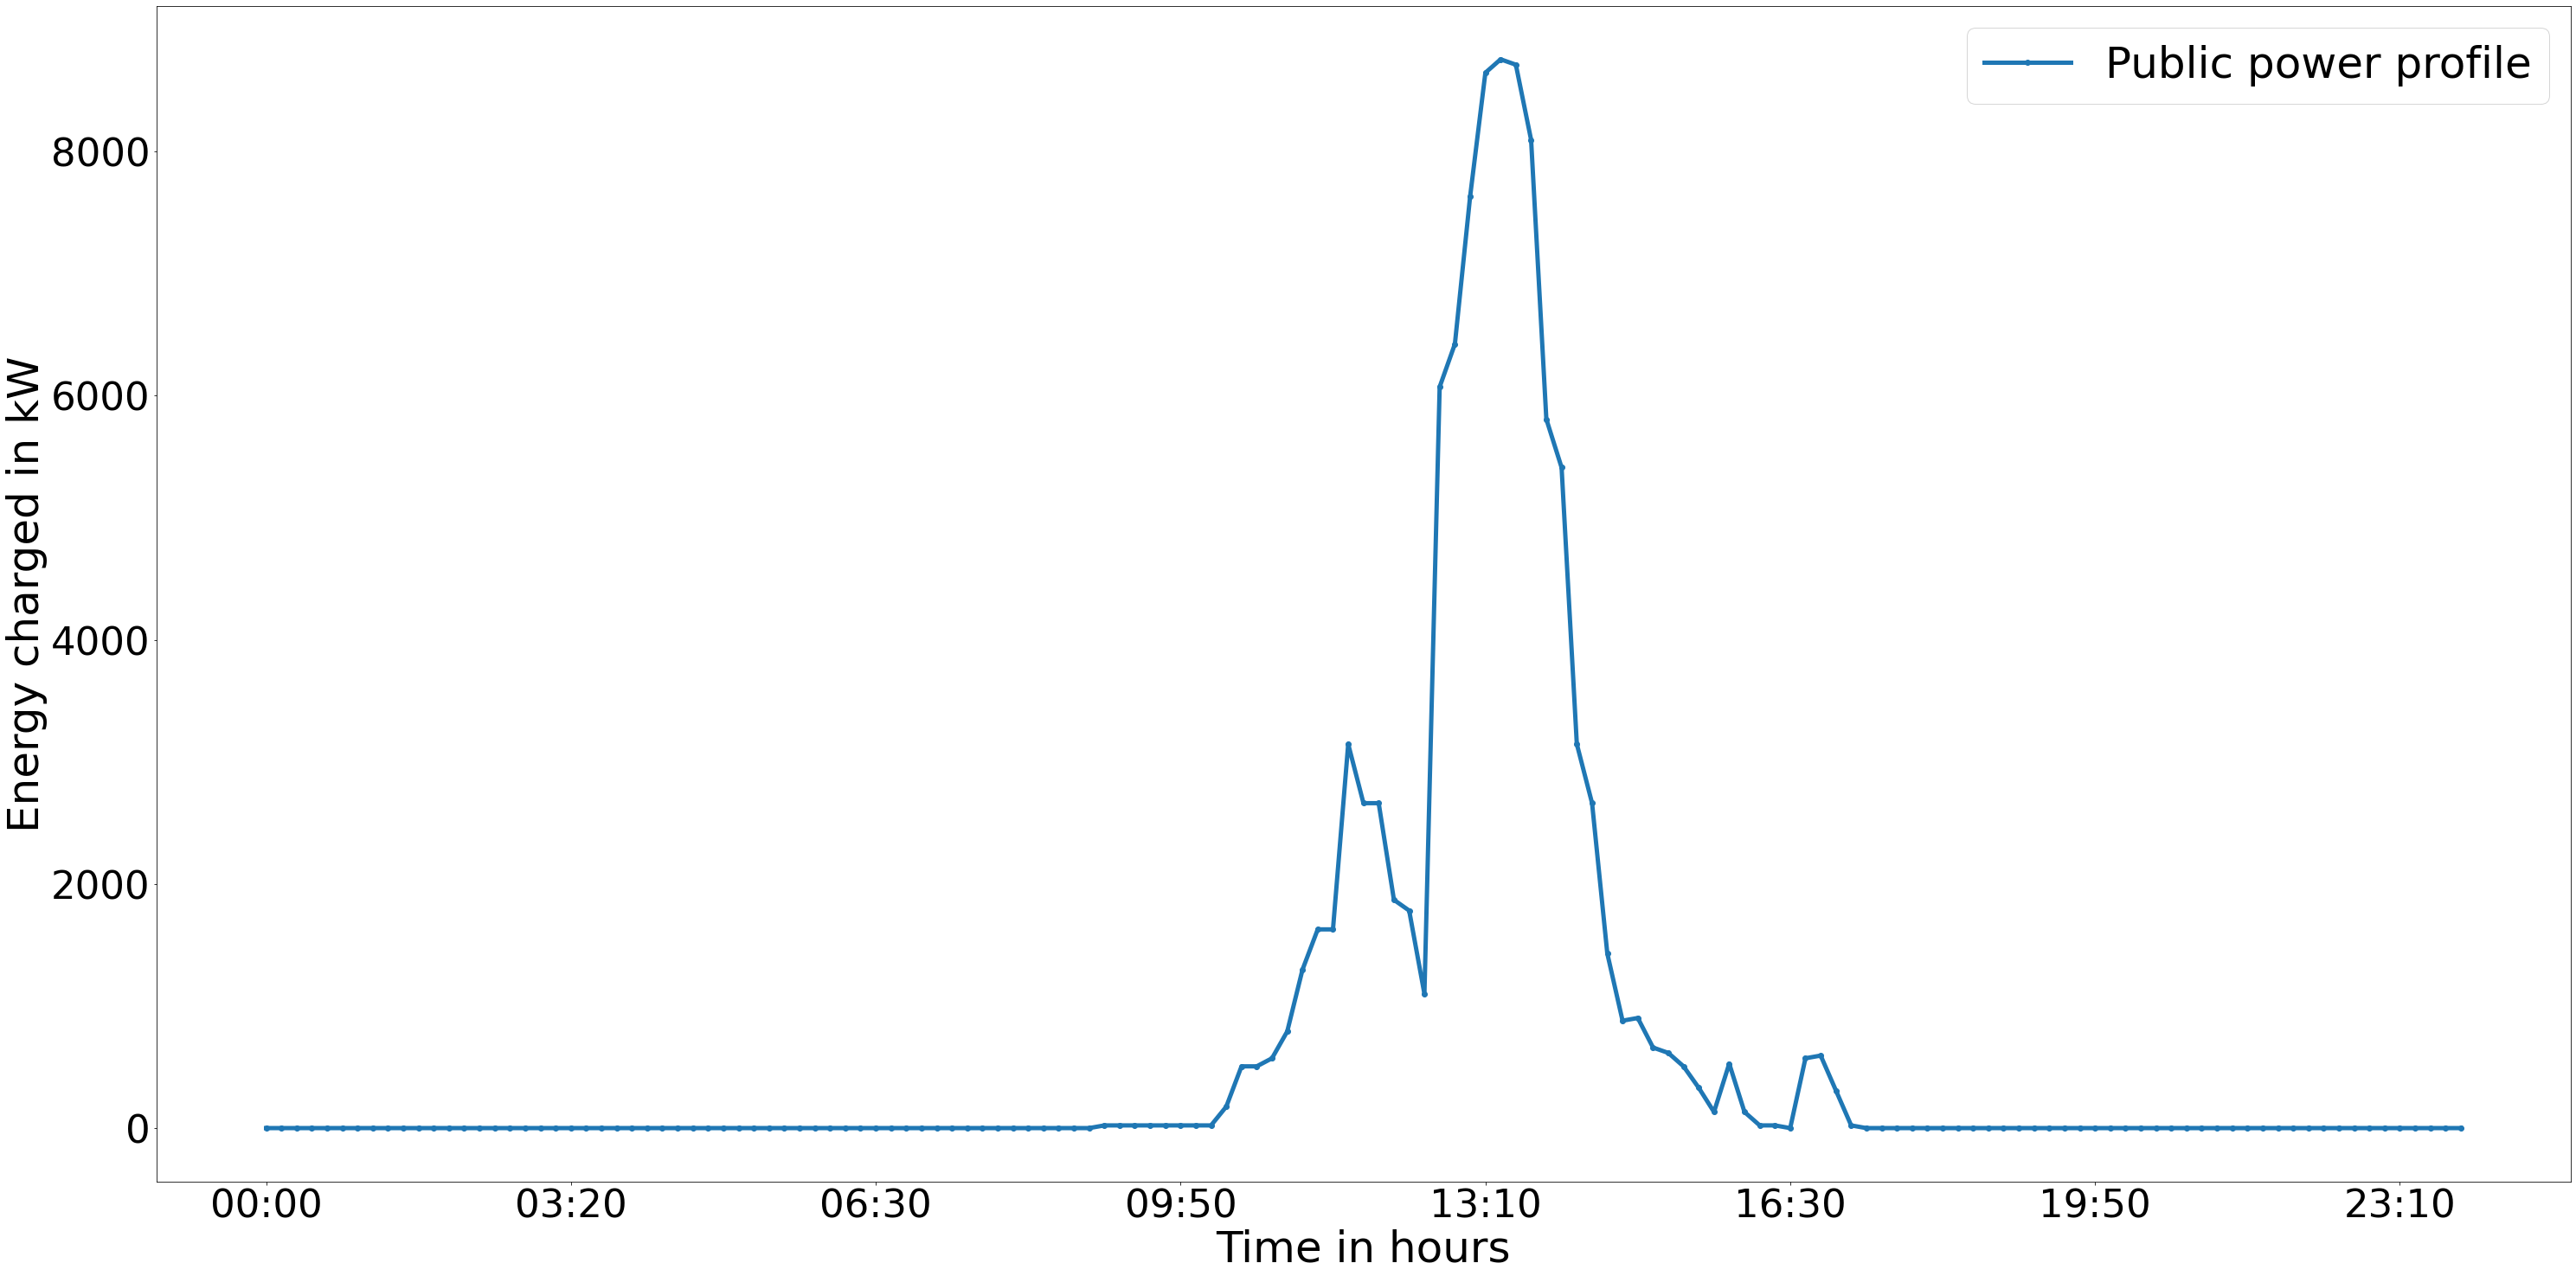

In [15]:
# Plot power profile of public
df_public.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Public power profile'], fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

In [14]:
# Setting for displaying all 145 rows
pd.set_option('display.max_rows', 145)